In [7]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('results.csv')

# Display the first few rows of the dataframe
df.head()

,dataset,method,last,mean,std,time,xcols,xcols_reduced,rank
0,xomo_ground.csv,Sym Feature Elim EFB,20,0.177907,0.067911,0.043480,23,11,2
1,xomo_ground.csv,Sym Feature Elim EFB,30,0.148837,0.051163,0.055920,23,11,1
2,xomo_ground.csv,Sym Feature Elim EFB,40,0.147674,0.061650,0.072293,23,11,1
3,xomo_ground.csv,Sym Feature Elim KMEANS,20,0.200872,0.073805,0.046654,23,11,2
4,xomo_ground.csv,Sym Feature Elim KMEANS,30,0.162791,0.053031,0.059265,23,11,1


In [13]:
df.shape

(588, 10)

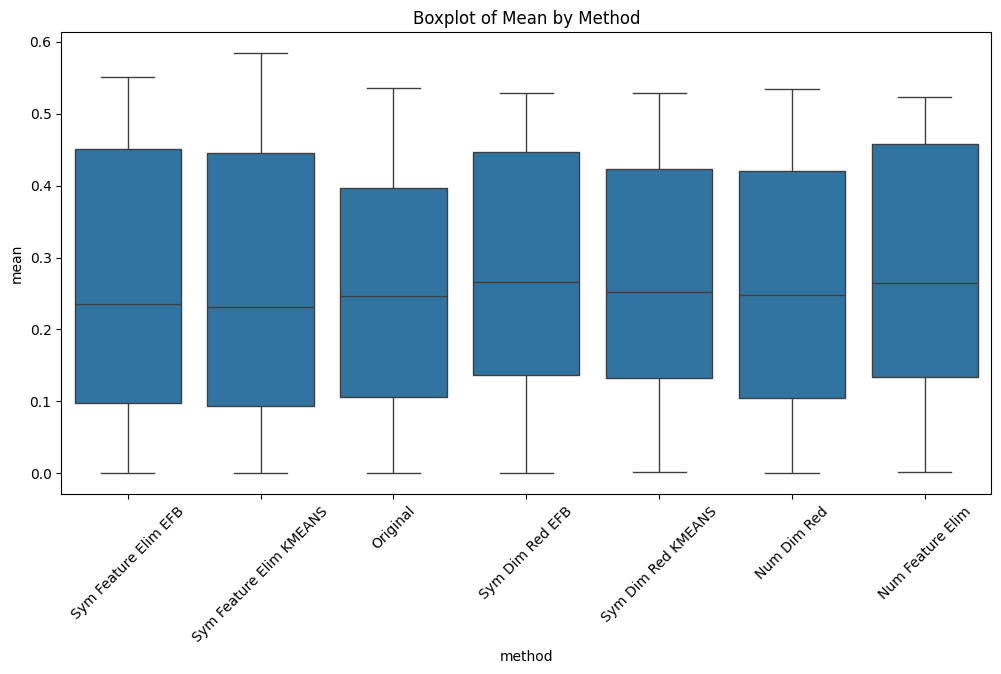

In [20]:
import seaborn as sns

import matplotlib.pyplot as plt

# Create a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='method', y='mean', data=df)
plt.title('Boxplot of Mean by Method')
plt.xticks(rotation=45)
plt.show()

In [9]:
import plotly.express as px

# Create the scatter plot
fig = px.scatter(df, x='mean', y='time', color='method', title='Scatter Plot of Mean vs Time Colored by Method')
fig.show()

In [16]:
rank_counts = df.groupby(['method', 'rank']).size().unstack(fill_value=0)
print(rank_counts)

rank                      0   1   2   3  4  5
method                                       
Num Dim Red              38  18  16   9  3  0
Num Feature Elim         30  26  15   7  3  3
Original                 53  12  13   4  2  0
Sym Dim Red EFB          27  22  23   7  5  0
Sym Dim Red KMEANS       31  22  14  12  5  0
Sym Feature Elim EFB     42  16  16   3  4  3
Sym Feature Elim KMEANS  44  18  12   4  3  3


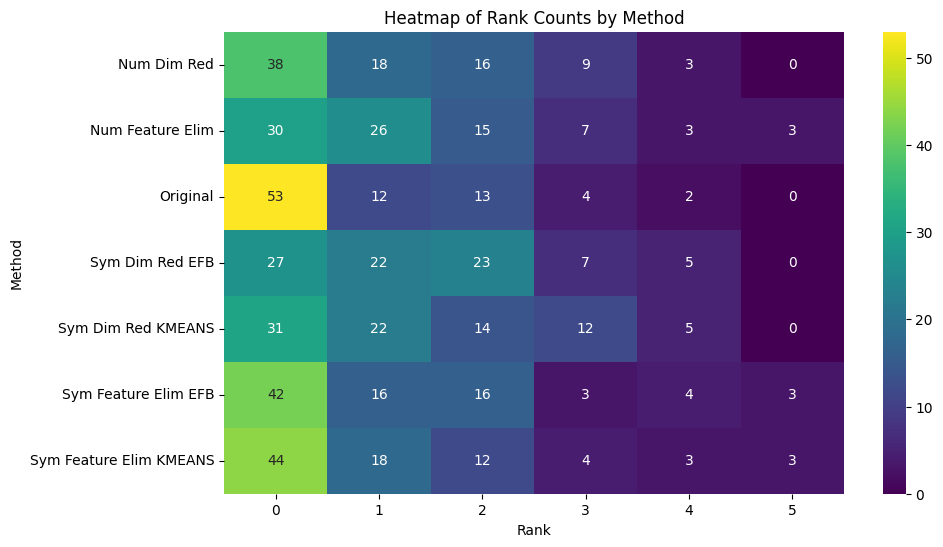

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(rank_counts, annot=True, cmap='viridis', fmt='d')
plt.title('Heatmap of Rank Counts by Method')
plt.xlabel('Rank')
plt.ylabel('Method')
plt.show()

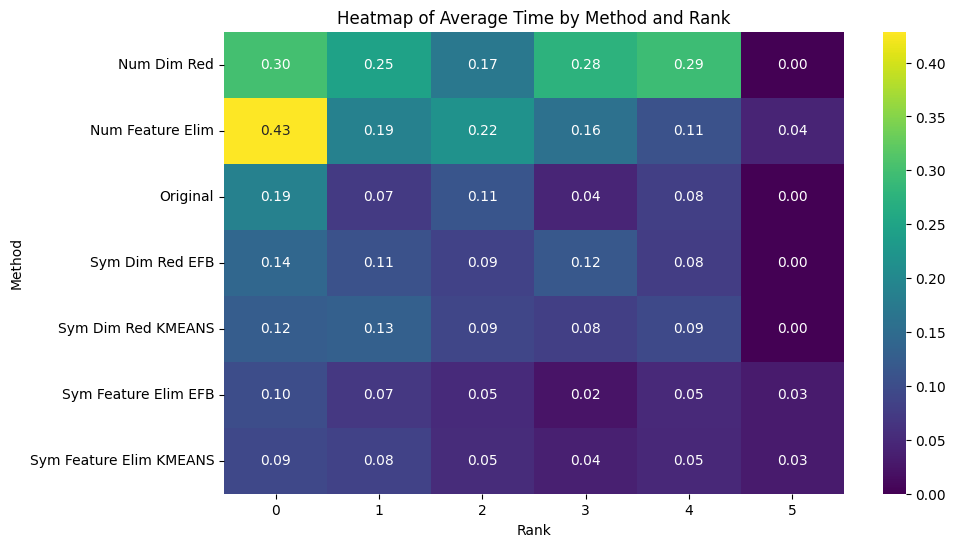

In [18]:
# Calculate the average time for each method and rank
avg_time = df.groupby(['method', 'rank'])['time'].mean().unstack(fill_value=0)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(avg_time, annot=True, cmap='viridis', fmt='.2f')
plt.title('Heatmap of Average Time by Method and Rank')
plt.xlabel('Rank')
plt.ylabel('Method')
plt.show()